To open notebook in Colab please click below:
<a href="https://colab.research.google.com/github/bwolfson2/data_biz_2021/blob/main/Module_1_Dealing_with_Data/1%20Dealing_with_data.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

In [1]:
#If opening in colab run this cell
#!git clone https://github.com/bwolfson2/data_biz_2021
#%cd data_biz_2021/Module_1_Dealing_with_Data/
data_dir="/Users/rogermstein/Dropbox/Current-Work/_WORK/__Teaching/000\ -\ 2021\ -\ Summer\ -\ NYU\ -\ Data\ Science\ For\ Business/Matieral/Data/1\ data\ -\ pandas 
"

Cloning into 'data_biz_2021'...
remote: Enumerating objects: 354, done.
remote: Counting objects: 100% (354/354), done.
remote: Compressing objects: 100% (272/272), done.
remote: Total 463 (delta 156), reused 257 (delta 75), pack-reused 109
Receiving objects: 100% (463/463), 61.75 MiB | 20.94 MiB/s, done.
Resolving deltas: 100% (195/195), done.
Checking out files: 100% (69/69), done.
/content/data_biz_2021/Module1_Bash_Pandas


# Python and Pandas Data Frames



Summer 2021 - Instructors: Roger M. Stein and Ben Wolfson

Teaching Assistant: Ben Wolfson

***

## Python Packages and Built-in Functions

Python has a ton of packages that make doing complicated stuff very easy. We won't discuss how to install packages, or give a detailed list of what packages exist, but we will give a brief description about how they are used. 

An easy way to think of why package are useful is by thinking: "**Python packages give us access to MANY functions**".

Packages contain pre-defined functions (built-in) that make our life easier!  We've seen pre-defined functions before, for example, the funciton 'str()' that we used to convert numbers into strings in the Python Basics notebook.

In this class we will use five packages very frequently: `pandas`, `sklearn`, `matplotlib`,  `seaborn`, and `numpy`:

- **`pandas`** is a data manipulation package. It lets us store data in data frames. More on this soon.
- **`sklearn`** is a machine learning and data science package. It lets us do fairly complicated machine learning tasks, such as running regressions and building classification models with only a few lines of code. (Nice!)
- **`statsmodels.api`** is a statistical and econometrics package that is newer than, but more "statistcal" than `sklearn`. It has two main advantages over `sklearn` (a) a more intuitive set of reporting and analysis tools that include a number of advanced statistical and econometric techniques for time series, regime-switching and other applications; and (b) a formula-based (vs. matrix/vector) representation of models (as in R), which makes experimenting with data transformations much easier. It is Roger's first choice for anything involving time-series, generalized linear models or complex model designs in Python.  You should note that it uses a different set of conventions for model representation (but it is easy to write an `sklearn` wrapper if you prefer - see the `patsy` package). It lets us do fairly complicated statistical and econometric tasks, such as building statistical models with only a few lines of code. (Nice!)
- **`matplotlib`** lets you make plots and graphs directly from your code.  This can be a secret weapon when combined with notebooks, as you can very easily rerun analyses on different data or with slightly different code, and the graphs can just appear magically.  (Ok, always easier said than done, but you get the idea.)
- **`seaborn`** an extension to matplotlib that really helps make your plots look more appealing.
- **`numpy`** (pronounced num-pie) is used for doing "math stuff", such as complex mathematical operations (e.g., square roots, exponents, logs), operations on matrices, and more. 

As we use these through the semester, their usefulness will become increasingly apparent.

To make the contents of a package available, you need to import it:

In [2]:
import pandas
import sklearn
import matplotlib
import numpy
import seaborn

Sometimes it is easier to use short names for packages. This has become the norm now, so let's do it so that you recognize it if you encounter it in your work.

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# this trick is required to get plots to display inline with the rest of your notebook,
# not in a separate window
%matplotlib inline

# just some stylistic tweaks for seaborn
sns.set(style='ticks', palette='Set2')

We can now use package-specific things. For example, numpy has a function called `sqrt()` which will give us the square root of a numpy number. Since it is part of numpy, we need to tell Python that that's where it is by using a dot (e.g., `np.sqrt()`).

In the following cell you can also see how to write **comments** in your code. Take my advice: write comments as you go.  It's helpful when you want to collaborate, then you don't have to figure out what you did to explain it to your collaborator.  But even more: often you need to come back to an analysis weeks, months, or even years later, and you will thank yourself for explaining what you did!

In [4]:

some_list = [0,0,1,2,3,3,4.5,7.6]
print(some_list)
some_dictionary = {'student1': '(929)-000-0000', 'student2': '(917)-000-0000', 'student3': '(470)-000-0000'}
print(some_dictionary)
some_set = set( [1,2,4,4,5,5] )
print(some_set)


# In this part of the code I am using numpy (np) functions

print ("Square root: " + str ( np.sqrt(25) ))
print ("Maximum element of our previous list: " + str( np.max(some_list) ))

# In this part of the code I am using python functions

print ("Number of elements in our previous list: " + str( len(some_list) ))
print ("Sum of elements in our previous list: " + str( sum(some_list) ))
print ("Range of 5 numbers (remember we start with 0): " + str( range(5) ))

# #Bonus LIST COMPREHENSIONS
# some_list_squared = [i*i for i in some_list]
# #This is the same as:
# some_list_squared_too = []
# for i in some_list:
#     some_list_squared_too.append(i*i)

# print(f"some_list_squared: {some_list_squared} = some_list_squared_too:{some_list_squared_too}")



[0, 0, 1, 2, 3, 3, 4.5, 7.6]
{'student1': '(929)-000-0000', 'student2': '(917)-000-0000', 'student3': '(470)-000-0000'}
{1, 2, 4, 5}
Square root: 5.0
Maximum element of our previous list: 7.6
Number of elements in our previous list: 8
Sum of elements in our previous list: 21.1
Range of 5 numbers (remember we start with 0): range(0, 5)


What about the package **Pandas**? 

Pandas gives us the **DATAFRAME** -- one of the main data structures used in data analytics.

A Dataframe is 2-dimensional "labeled" data structure with columns of potentially different types. It is generally the most commonly used pandas object. Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. It's often convenient to think of it as a spreadsheet with super powers! [More details here](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

Pandas data frames can be constructed from most common data sources a data scientist will encounter: csv files, excel spreadsheets, sql databases, json, url pointers to other data sources, and even from other data already stored in one's python code. 

Let's take a look at creating a data frame from a common "toy" dataset presenting automobile mpg information.


In [5]:
# This reads the data from a url and sets the column names.
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name']
mpg_df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)

We now have the data loaded in a pandas data frame, as a starter, let's see some of the (MANY!) ways pandas makes it convenient to explore a dataset

In [6]:
# First, just get a peek at the data:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [7]:
# Some general stats about the data
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
# Info about the rows and columns themselves
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
model           406 non-null float64
origin          406 non-null float64
car_name        406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


In [9]:
# How many of each type of engine? 
mpg_df["cylinders"].value_counts()

4.0    207
8.0    108
6.0     84
3.0      4
5.0      3
Name: cylinders, dtype: int64

In [10]:
# Total horsepower
mpg_df["horsepower"].sum()

42033.0

In [11]:
# Average horsepower per engine type
mpg_df.groupby("cylinders").horsepower.mean()

cylinders
3.0     99.250000
4.0     78.470297
5.0     82.333333
6.0    101.506024
8.0    158.453704
Name: horsepower, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0817f2ac8>]], dtype=object)

/Users/rogermstein/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


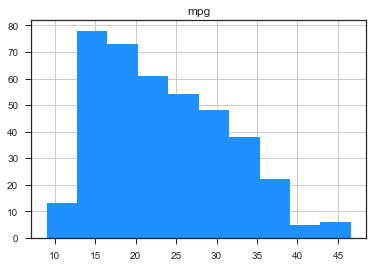

In [12]:
# Plot a histogram of mpg
mpg_df.hist("mpg",color='dodgerblue')

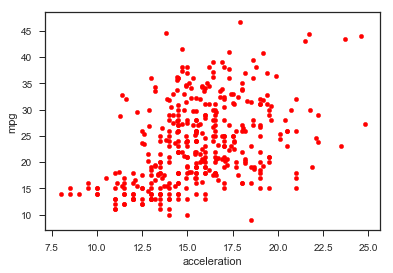

In [13]:
# Or a scatter plot of acceleration vs mpg
mpg_df.plot(kind="scatter", x="acceleration", y="mpg", c='red')

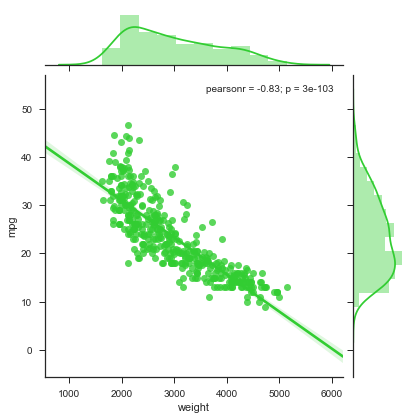

In [14]:
# Some pretty plotting comparing weight to mpg using regression in seaborn
sns.jointplot(x="weight", y="mpg", data=mpg_df, kind="reg",color='limegreen')

Pandas is widely used and has a very active development community contributing new features. If there is some kind of analysis you want to do on your data, chances are, it already exists. The [documentation for the pandas library](https://pandas.pydata.org/pandas-docs/stable/) is very good, but the site's search functionality is, unfortunately, poor. Google is oftenn better to find the information you need.

One important component of pandas is indexing and selecting components of the data. This is a extremely rich topic, so we'll only touch on it here. Please [consult the documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more info. 

In [15]:
# Columns can be selected using the `[]` operator, which accepts one column name or a list of several
mpg_df[["cylinders", "car_name"]].head(5)

,cylinders,car_name
0,8.0,chevrolet chevelle malibu
1,8.0,buick skylark 320
2,8.0,plymouth satellite
3,8.0,amc rebel sst
4,8.0,ford torino


In [16]:
# As some "syntactic sugar", pandas also allows selection using the `.column_name` notation
mpg_df.car_name.head()

0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
Name: car_name, dtype: object

In [17]:
# Note that this can also be used for assignment of values!
original_names = mpg_df.car_name.copy()
mpg_df.car_name = original_names + " Test!"
print(mpg_df.car_name.head())
mpg_df.car_name = original_names

0    chevrolet chevelle malibu Test!
1            buick skylark 320 Test!
2           plymouth satellite Test!
3                amc rebel sst Test!
4                  ford torino Test!
Name: car_name, dtype: object


For selecting rows from the data there are two options:
- `.loc`: for selecting rows based on the _row label_
- `.iloc`: for selecting rows based on the _row number_

In the prior example, the row label and the row number are the same; often one wants to assign a label (a unique id) to each rows. In many cases, this would be something like a date or a user id. Note: these two selectors can also be used to pick columns, but that's a bit less common. 

In [18]:
# Returns row #5 -- the 6th row.  NB: it returns one row as a column!
mpg_df.iloc[5]

mpg                           15
cylinders                      8
displacement                 429
horsepower                   198
weight                      4341
acceleration                  10
model                         70
origin                         1
car_name        ford galaxie 500
Name: 5, dtype: object

In [19]:
# Returns the first 6 rows
mpg_df.iloc[:6]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500


If we have _actual labels_ as an index for a dataframe, we can use `.loc` to select using values from that index

In [20]:
#Let's set the row label (index) to be the car name.  Note: these are not unique.
car_index_df = mpg_df.set_index("car_name", inplace=False)
#Now, let's see what we have for a couple car names
car_index_df.loc[["amc rebel sst", "plymouth fury iii"]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
car_name,,,,,,,,
amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
plymouth fury iii,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0
plymouth fury iii,14.0,8.0,318.0,150.0,4096.0,13.0,71.0,1.0
plymouth fury iii,15.0,8.0,318.0,150.0,4135.0,13.5,72.0,1.0


One can also select those rows that match a particular condition. Say I want to only see those rows that have an acceleration less that 10 seconds

In [21]:
mpg_df[mpg_df.acceleration < 10]  #some of the classic muscle cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl
16,14.0,8.0,340.0,160.0,3609.0,8.0,70.0,1.0,plymouth 'cuda 340
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
18,15.0,8.0,400.0,150.0,3761.0,9.5,70.0,1.0,chevrolet monte carlo
123,16.0,8.0,400.0,230.0,4278.0,9.5,73.0,1.0,pontiac grand prix


Often, one wants to create a data frame from information that is available "in code"- these might be results of prior computations that aren't already in pandas or maybe just some small static dataframe that stores some info. There are two common ways to do this: (1) lists-of-lists with an additional list of column names and (2) lists of dictionaries. I prefer the latter since the data in this case is self-descriptive, order isn't important, and missing data is handled more smoothly, but I'll give examples below for both. 

In [22]:
# List-of-lists approach

list1 = ['studentA',22,'(929)-000-000']
list2 = ['studentB',np.nan,'(646)-000-000']
list3 = ['studentC',30,'(917)-000-000']
list4 = ['studentD',31,'(646)-001-001']
list5 = ['studentE',np.nan,'(929)-001-001']
list6 = ['studentF',30,'(917)-001-001']
list7 = ['studentG',30,'(470)-001-001']

list_of_lists = [list1, list2, list3, list4, list5, list6, list7]
column_names = ['Name','Age','Mobile']

lol_df = pd.DataFrame(list_of_lists,columns=column_names)
lol_df.head(5)

,Name,Age,Mobile
0,studentA,22.0,(929)-000-000
1,studentB,NaN,(646)-000-000
2,studentC,30.0,(917)-000-000
3,studentD,31.0,(646)-001-001
4,studentE,NaN,(929)-001-001


In [23]:
# This is the list of dicts approach
alice = {"name": "alice", "age": 25, "mobile":"555-222-9000"}
bob = {"name": "bob", "age": 100}
casey = {"age":35, "name": "casey", "mobile":"1-877-kars-4kids"}

list_of_dicts = [alice, bob, casey]
lod_df = pd.DataFrame(list_of_dicts)
lod_df.head(5)

,age,mobile,name
0,25,555-222-9000,alice
1,100,NaN,bob
2,35,1-877-kars-4kids,casey


We can also add columns (they should have the same number of rows as the dataframe they are being added to)

In [24]:
lol_df['Business Major'] = ['yes','no','yes','yes','yes','no','yes']
lol_df['Years Experience'] = [1,4,2,6,0,3,0]
lol_df.head(5)

,Name,Age,Mobile,Business Major,Years Experience
0,studentA,22.0,(929)-000-000,yes,1
1,studentB,NaN,(646)-000-000,no,4
2,studentC,30.0,(917)-000-000,yes,2
3,studentD,31.0,(646)-001-001,yes,6
4,studentE,NaN,(929)-001-001,yes,0



What about operations on entire columns? This can make data munging much easier!

Let's take the difference between age and years of experience:


In [25]:
lol_df["Age"] - lol_df["Years Experience"]

0    21.0
1     NaN
2    28.0
3    25.0
4     NaN
5    27.0
6    30.0
dtype: float64

All of the data frames used thus far have had missing values. We see that by default, pandas just displays `NaN`, when the value of a cell is unknown. Sometimes this interferes with the computation we're trying to accomplish. Fortunately, there is a [suite of functionality](https://pandas.pydata.org/pandas-docs/stable/missing_data.html) for dealing with missing data built in.

Let's (for some reason) fill missing age info with the average age when doing our computation..

In [26]:
lol_df["Age"].fillna(lol_df["Age"].mean()) - lol_df["Years Experience"]

0    21.0
1    24.6
2    28.0
3    25.0
4    28.6
5    27.0
6    30.0
dtype: float64

#### Extra added bonus!!   ---  Auto-complete

One of the most useful things about IPython notebook is its tab completion. 

Try this: type `np.sqrt(` in the cell below and press `Shift + Tab` 4 times, slowly

In [38]:
np.sqrt()

ValueError: invalid number of arguments

I find this amazingly useful. I think of this as "the more confused I am, the more times I should press Shift+Tab". Nothing bad will happen if you tab complete 12 times.

Okay, let's try tab completion for function names! Type `np.sq` then hit `Tab` when typing below to get suggestions.

In [ ]:
np.sq

This is super useful when (like me) you forget the names of everything!

#### Special Bonus 2! -- inline python help
One of the coolest things about jupyter notebooks is that they give you access to the documentation of the objects and functions you're interacting with inside the notebook! just put a `?` at the beginning of the line, followed immediately by the thing you'd like help on:


In [ ]:
?np.sqrt


In [ ]:
?float

# A Taste of What's to Come: Predictive Modeling
We've seen thus far some examples of how jupyter, pandas and some other tools are great for manipulating and exploring data. This is great, but much of the power of data comes from its ability to help us predict/estimate unknown quantities. While this topic will be explored in much greater depth throughout the remainder of this course, let's take a sneak peek into some of what we'll be doing in the future. 

For this, let's build a simple model to predict the mpg of cars from the other information we have available on those cars.

In [39]:
# First we'll need to import the predictive model class that we'll use
from sklearn import linear_model 

# Now, choose a particular kind of linear regression model
# Get set up to "train" one of those (learn it from data)
my_linear = linear_model.LinearRegression()

# Assemble the training data (we will define all this nomenclature in the next few classes)
# Let's use these columns as features and the target variable
features = ["weight", "acceleration", "cylinders", "displacement"]
target = "mpg"

# Eliminate (drop) any instances with missing values (NaNs) for now
cleaned_df = mpg_df.dropna()

# Train the model you set up on the data
#   a.k.a. Fit the model to the data!
my_linear.fit(cleaned_df[features], cleaned_df[target])

# Show the coefficients of the linear model
pd.DataFrame([dict(zip(features, my_linear.coef_))])

,acceleration,cylinders,displacement,weight
0,0.187454,-0.284043,-0.006532,-0.006131


In [70]:
# Let's get some predictions from the model
preds = my_linear.predict(cleaned_df[features])
predictions_df = cleaned_df.assign(predictions=preds)
predictions_df[["mpg", "predictions"]].head(5)

,mpg,predictions
0,18.0,18.101246
1,15.0,16.567928
2,18.0,18.258835
3,16.0,18.556128
4,17.0,18.189917


<AxesSubplot:xlabel='mpg', ylabel='predictions'>

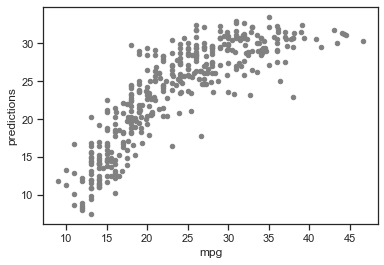

In [37]:
# Can we visualize how good our predictions are?
# Let's plot the predicted mpg vs. the true value
predictions_df.plot(kind="scatter", x="mpg", y="predictions", c='gray')
# Q: What would perfect predictions look like?
# Q: How would you describe our predictive ability here?

To get  an idea of the difference between `statsmodels.api` and `sklearn`, let's fit the same model using `statsmodels.api`:

In [30]:
import statsmodels.formula.api as smf

features = ["weight", "acceleration", "cylinders", "displacement"]
target = "mpg"

# Eliminate (drop) any instances with missing values (NaNs) for now
cleaned_df = mpg_df.dropna()
#cleaned_df = sm.add_constant(cleaned_df)

# Train the model you set up on the data
#   a.k.a. Fit the model to the data!

#spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)
my_formula='mpg~weight+acceleration+cylinders+displacement'

my_OLS = smf.ols(formula=my_formula,data=cleaned_df)   # sm.ols(cleaned_df[target], cleaned_df[features]) would 
                                                       # produce the same result if you added a constant to the df
my_linear_sm = my_OLS.fit()

First, check that we can produce the `sklearn` output:

In [ ]:
pd.DataFrame([dict(zip(features, my_linear.coef_))])

In [ ]:
pd.DataFrame([dict(zip(features, my_linear_sm.params[1:]))]) # NOTE: we supress the inclusion of the constant term
                                                             # to make the parameter data frame look the same as above

In [41]:
my_linear_sm_d_summary = my_linear_sm.summary()
print(my_linear_sm.summary())  # produce text report for easy reading
my_linear_sm_d_summary         # produce list of 3 SimpleTables containing the statisics      

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     228.0
Date:                Tue, 29 Jun 2021   Prob (F-statistic):          2.33e-100
Time:                        05:28:32   Log-Likelihood:                -1123.8
No. Observations:                 392   AIC:                             2258.
Df Residuals:                     387   BIC:                             2278.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       41.6117      2.064     20.159   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     228.0
Date:                Tue, 29 Jun 2021   Prob (F-statistic):          2.33e-100
Time:                        05:28:32   Log-Likelihood:                -1123.8
No. Observations:                 392   AIC:                             2258.
Df Residuals:                     387   BIC:                             2278.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       41.6117      2.064     20.159      0.000      37.553      45.670
weight          -0.0061      0.001     -8.228      0.000      -0.008      -0.005
acceleration     0.1875      0.098      1.912      0.057      -0.005       0.380
cylinders       -0.2840      0.412     -0.690      0.491      -1.094       0.526
displacement    -0.0065      0.009     -0.740      0.460      -0.024       0.011
==============================================================================
Omnibus:                       36.616   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.766
Skew:                           0.680   Prob(JB):                     1.56e-11
Kurtosis:                       4.095   Cond. No.                     2.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# Let's get some predictions from the model
preds = my_linear_2.predict(cleaned_df)
predictions_sm_df = cleaned_df.assign(predictions=preds)
predictions_sm_df[["mpg", "predictions"]].head(5)

,mpg,predictions
0,18.0,18.101246
1,15.0,16.567928
2,18.0,18.258835
3,16.0,18.556128
4,17.0,18.189917


<AxesSubplot:xlabel='mpg', ylabel='predictions'>

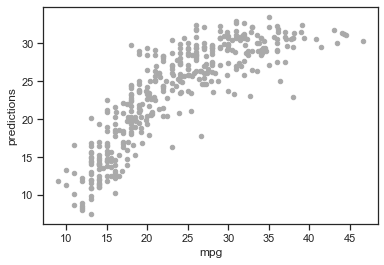

In [75]:
predictions_sm_df.plot(kind="scatter", x="mpg", y="predictions", c='darkgray')

And...

In [82]:
# run with log of weight: 
my_formula='mpg~np.log(weight)+acceleration+cylinders+displacement'
my_OLS = smf.ols(formula=my_formula,data=cleaned_df)  
my_linear_sm = my_OLS.fit()
print(my_linear_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     229.1
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          1.25e-100
Time:                        21:25:39   Log-Likelihood:                -1123.2
No. Observations:                 392   AIC:                             2256.
Df Residuals:                     387   BIC:                             2276.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            43.8809      2.87

In [83]:
# run with interaction of weight and acceleration: 
my_formula='mpg~weight+acceleration+cylinders+displacement+weight:acceleration'
my_OLS = smf.ols(formula=my_formula,data=cleaned_df)  
my_linear_sm = my_OLS.fit()
print(my_linear_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     190.9
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          5.45e-102
Time:                        21:26:11   Log-Likelihood:                -1117.2
No. Observations:                 392   AIC:                             2246.
Df Residuals:                     386   BIC:                             2270.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              23.5133    

In [84]:
# run with all possible interactions: 
my_formula='mpg~weight*acceleration*cylinders*displacement'
my_OLS = smf.ols(formula=my_formula,data=cleaned_df)  
my_linear_sm = my_OLS.fit()
print(my_linear_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     78.24
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          1.44e-105
Time:                        21:27:09   Log-Likelihood:                -1083.6
No. Observations:                 392   AIC:                             2199.
Df Residuals:                     376   BIC:                             2263.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

**USEFUL DIGRESSION**

*Note that all formulae follow the R conventions.  Here is the syntax guide from the R documentation with some additional annotations added for clarity and to make the formulae Pythonic:*

<u>*Formula basics*</u>
    
The `~` operator is basic in the formation of such models. An expression of the form :

    y ~ some model form 

is interpreted as a specification that the response y is modeled by a linear predictor specified symbolically by model. Such a model consists of a series of terms separated by `+` operators.  E.g.:

    y ~ x1 + x2 +x3
    
would be interpreted as :

<p style="font-family:Garamond, Georgia, Times, Serif">

"*y = a + b<sub>1</sub> * x<sub>1</sub> + b<sub>2</sub> * x<sub>2</sub> + b<sub>3</sub> * x<sub>3</sub> + e* .</p> (where *e* is an error term). 

While formulae usually involve just variable and factor names, they can also involve arithmetic expressions. The formula :

    np.log(y) ~ a + np.log(x) 

is quite legal.

<u>*Using formula operators as arithmatic operators  in model formulae*</u>   *(e.g., `+`, `^`, `*`, etc. -- see below)*
    
When such arithmetic expressions involve operators which are also used symbolically in model formulae (e.g., `^`), there can be confusion between arithmetic and symbolic operator use.

To avoid this confusion, the function `I()` can be used to bracket those portions of a model formula where the operators are used in their arithmetic sense. For example, in the formula :

    y ~ a + I(b+c), 
    
the term `b+c` is to be interpreted as the sum of b and c.

<u> *Interaction and other 'advanced' operators*</u>

Iteractions between variables are denoted by using a `:` rather than a `+`. 

In addition to `+` and `:`, a number of other operators are useful in model formulae. 
- `*` operator denotes factor crossing: `a*b` interpreted as "a + b + a:b." 
- `^` operator indicates crossing to the specified degree. For example `(a+b+c)^` is identical to `(a+b+c)*(a+b+c)` which in turn expands to a formula containing the main effects for a, b and c together with their second-order interactions. 
- `%in%` operator indicates that the terms on its left are nested within those on the right. For example `a+b%in%a` expands to the formula a+a:b. 
- `-` operator removes the specified terms, so that `(a+b+c)^2 - a:b` is identical to `a + b + c + b:c + a:c`. It can also used to remove the intercept term: `y~x - 1` is a line through the origin. (A model with no intercept can be also specified as `y~x + 0` or `0 + y~x`.)

# *Hands-on exercises -- on your own* #


To master your new-found knowledge of Python, try these hands-on examples. 

Your homeworks will be in a similar format to this section.

Consider the following URL to a CSV file containing the results of compressive tests for various types of concrete

In [35]:
concrete_url = "https://www.openml.org/data/get_csv/1762521/phpZGl7F2"

**1. Load the CSV data into a pandas data frame. Print some high-level statistical info about the data frame's columns. HINT: You may also want to rename the columns.**

**2. How many rows have a compressive strength > 40 MPa?**

**3. Plot the histogram of Coarse Aggregate and Fine Aggregate values**

**4. Make a plot comparing compressive strength to age**

**5. Make a plot comparing compressive strength to age for only those rows with < 750 fine aggregate**

**6. Try to build a linear model that predicts compressive strength given the other available fields using `scikitlearn`**


**7. Generate predictions for all the observations and a scatterplot comparing the predicted compressive strengths to the actual values.**

**8. Try to build a linear model that predicts compressive strength given the other variables using `statsmodels.formula.api`.**